
# <p align="center"><span style="color:skyblue; font-weight:bold;">Détection de Billets Authentiques ou Contrefaits</span></p>



# Import des bibliothèques nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Ignorer les avertissements
warnings.filterwarnings('ignore')

# Prétraitement des Données 

### Chargement du jeu de données

In [3]:
chemin = "C:\\Users\\Ha\\Downloads\\projet_analyseD\\billets.csv"
donnees = pd.read_csv(chemin, delimiter=";")
donnees.head()
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


### Vérification des valeurs manquantes

In [4]:
print("Valeurs manquantes dans le jeu de données :")
print(donnees.isnull().sum())

Valeurs manquantes dans le jeu de données :
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


### Exploration de la distribution de chaque caractéristique

In [5]:
donnees.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


### Boîtes à moustaches pour chaque colonne

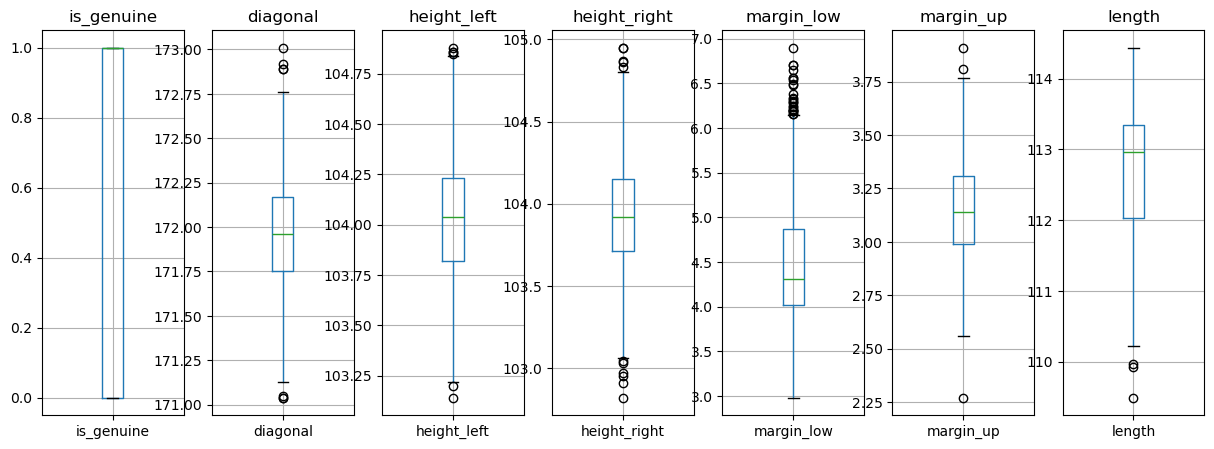

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=len(donnees.columns), figsize=(15, 5))
for i, colonne in enumerate(donnees.columns):
    donnees.boxplot(column=[colonne], ax=axes[i])
    axes[i].set_title(colonne)

plt.show()


- Chaque boxplot représente une mesure différente: “diagonal”, “height_left”, “height_right”, “margin_low”, “margin_up” et “length”. Il y a une classification binaire sur l’axe y étiquetée “is_genuine” avec des valeurs 0 et 1. L’axe x pour chaque graphique est échelonné différemment en fonction de la mesure représentée. Chaque graphique a des valeurs aberrantes

### Visualisation de la distribution de chaque caractéristique

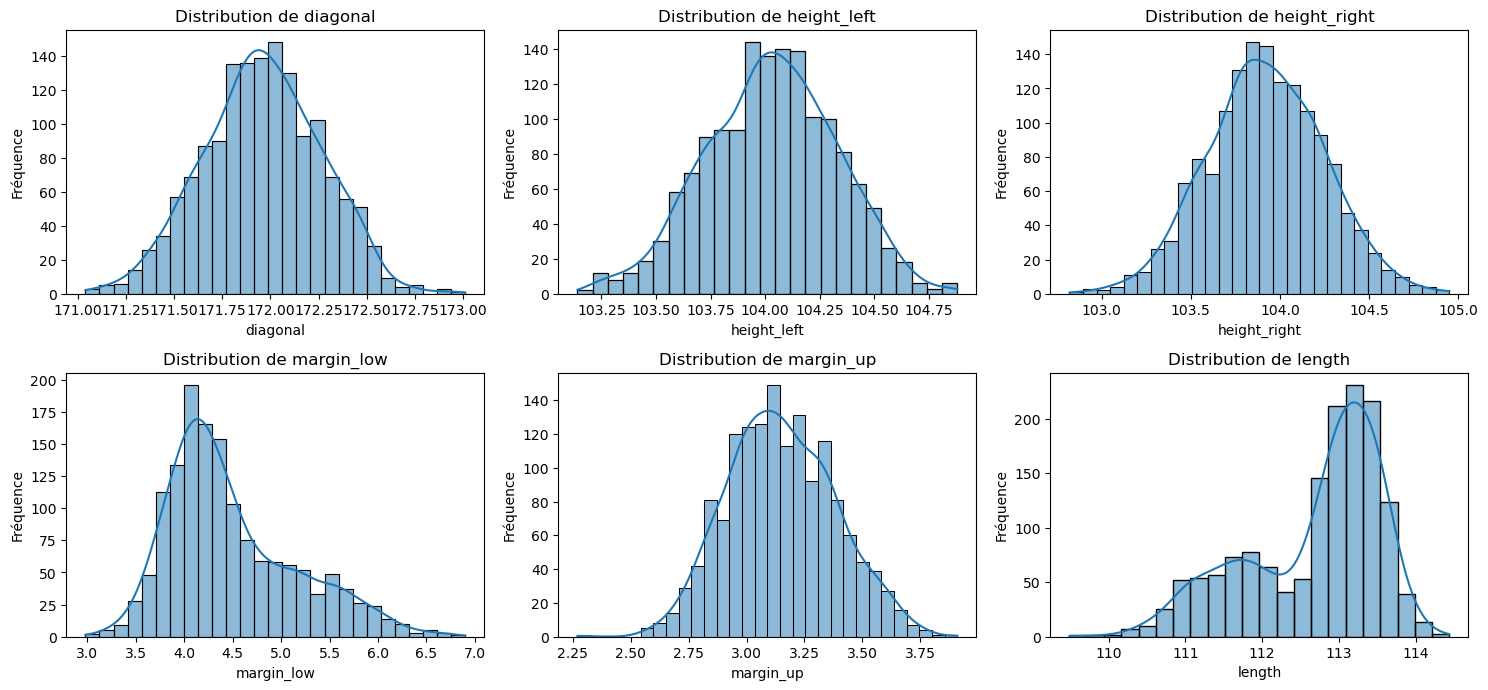

In [7]:
plt.figure(figsize=(15, 10))
for i, caracteristique in enumerate(donnees.columns[1:]):
    plt.subplot(3, 3, i+1)
    sns.histplot(donnees[caracteristique], kde=True)
    plt.title(f'Distribution de {caracteristique}')
    plt.xlabel(caracteristique)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

Les histogrammes montrent la distribution de fréquence pour chaque mesure. Les distributions semblent être normales ou presque normales, comme indiqué par leur forme en cloche.

### Visualisation des relations entre différentes caractéristiques

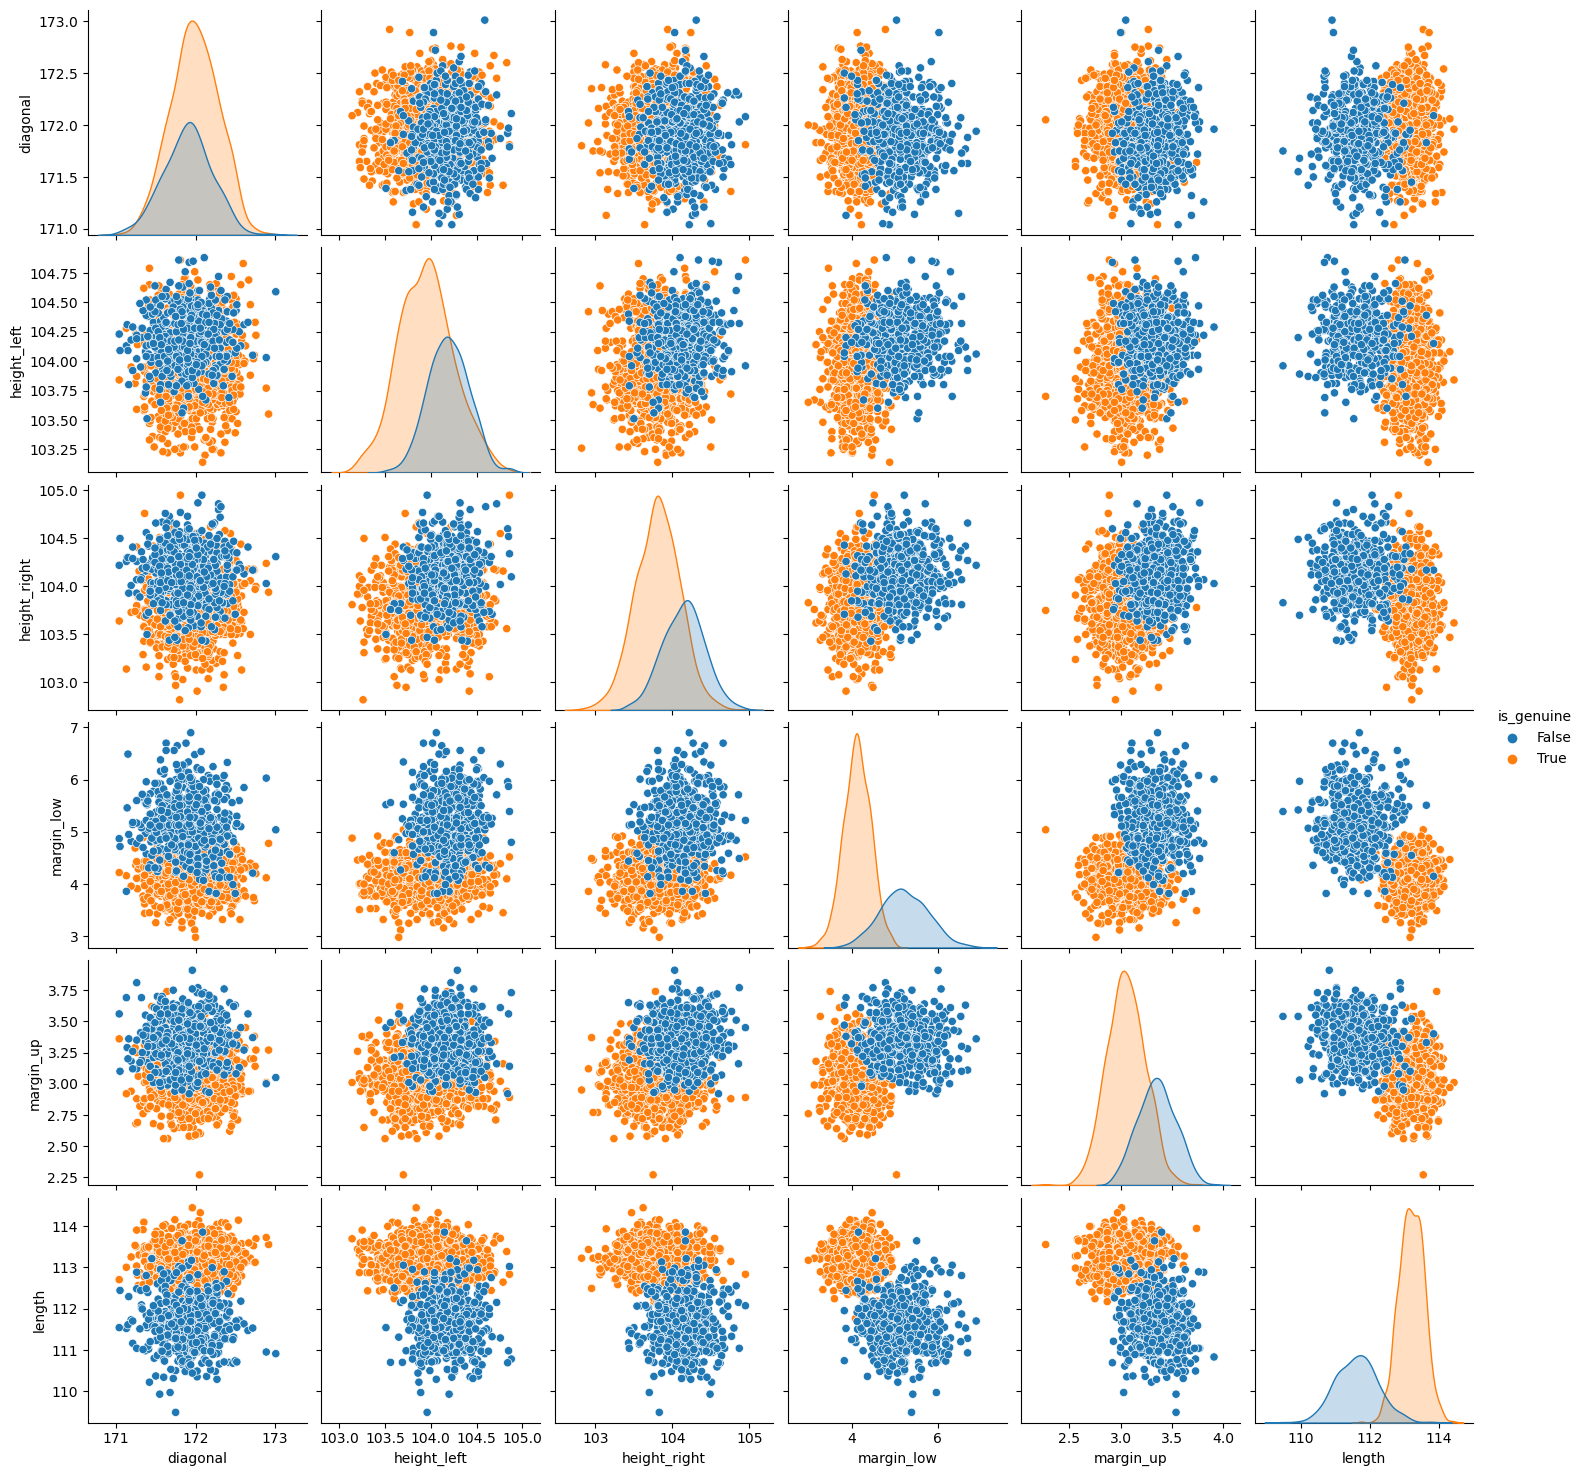

In [8]:
sns.pairplot(donnees, hue="is_genuine")
plt.show()

# Modèle de régression linéaire pour remplacer les valeurs manquantes

In [9]:
donnees_copie = donnees.copy()
donnees_copie["is_genuine"] = donnees_copie["is_genuine"].astype(int)

### Séparation des données en ensembles d'entraînement et de test

In [10]:
donnees_entrainement = donnees_copie.dropna()
donnees_test = donnees_copie[donnees_copie['margin_low'].isnull()]

X_entrainement = donnees_entrainement.drop('margin_low', axis=1)
y_entrainement = donnees_entrainement['margin_low']
X_test = donnees_test.drop('margin_low', axis=1)

modele_regression = LinearRegression()
modele_regression.fit(X_entrainement, y_entrainement)

predictions_margin_low = modele_regression.predict(X_test)

donnees_copie.loc[donnees_copie['margin_low'].isnull(), 'margin_low'] = predictions_margin_low


### Visualisation des prédictions par rapport aux valeurs réelles

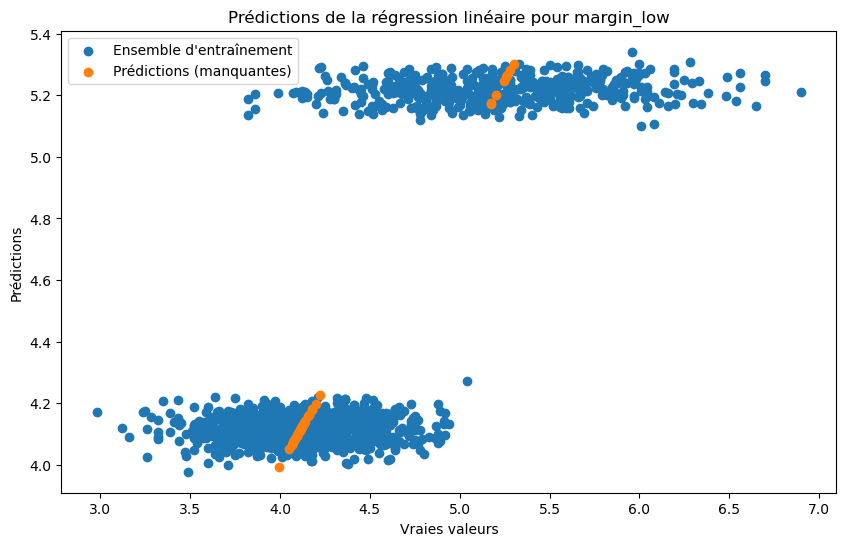

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_entrainement, modele_regression.predict(X_entrainement), label='Ensemble d\'entraînement')
plt.scatter(predictions_margin_low, predictions_margin_low, label='Prédictions (manquantes)')
plt.title('Prédictions de la régression linéaire pour margin_low')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.legend()
plt.show()

Le modèle de régression linéaire semble bien se généraliser aux prédictions des valeurs manquantes (points orange), qui suivent la même tendance que les données d'entraînement (points bleus). Cela indique que le modèle peut être utilisé de manière fiable pour estimer les valeurs manquantes dans ce jeu de données.

# Distribution des caractéristiques pour les billets authentiques et contrefaits

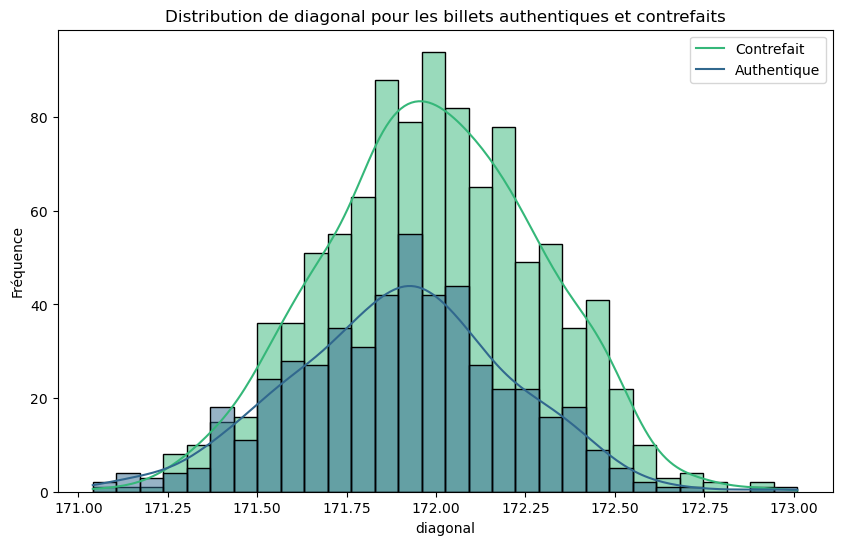

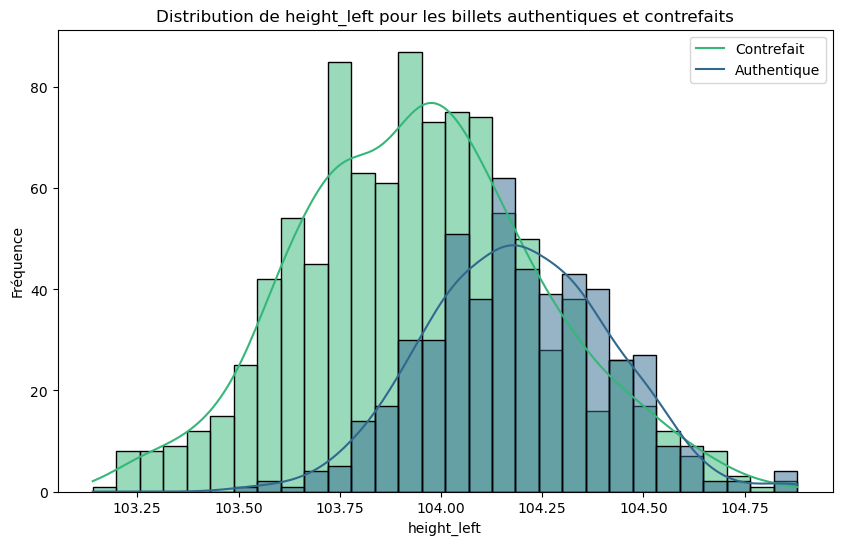

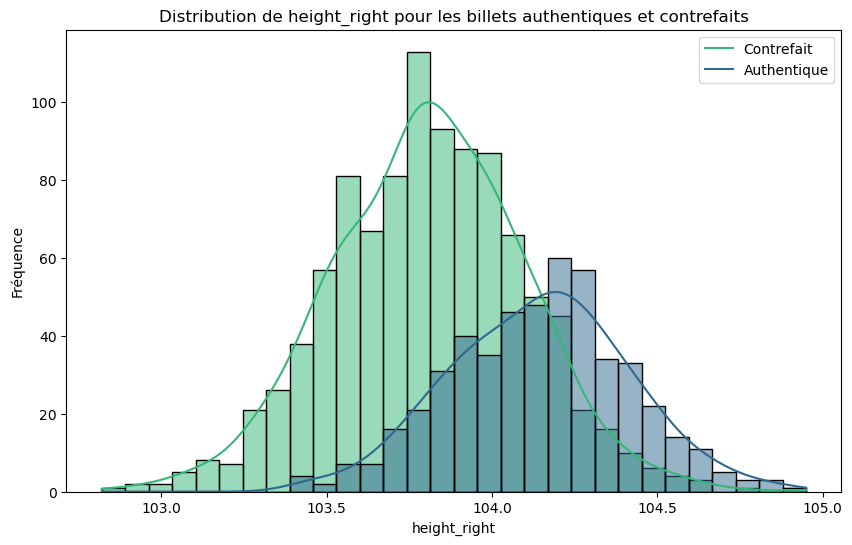

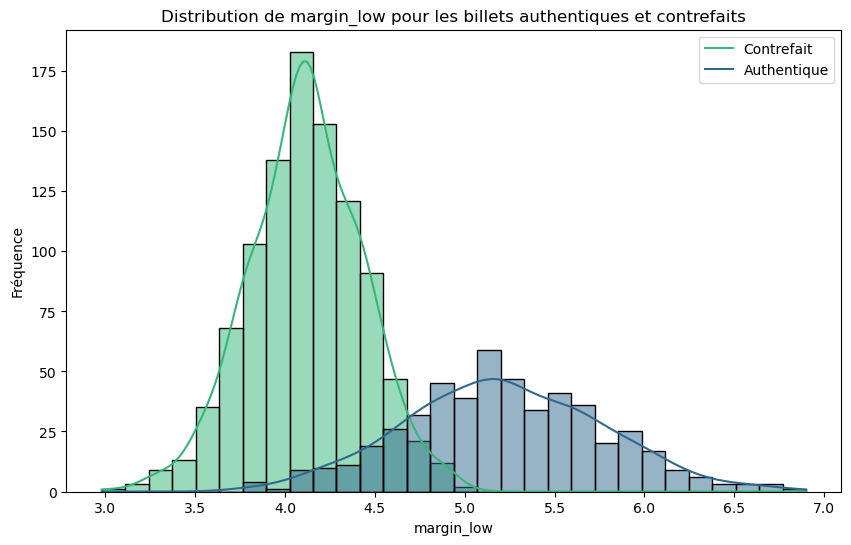

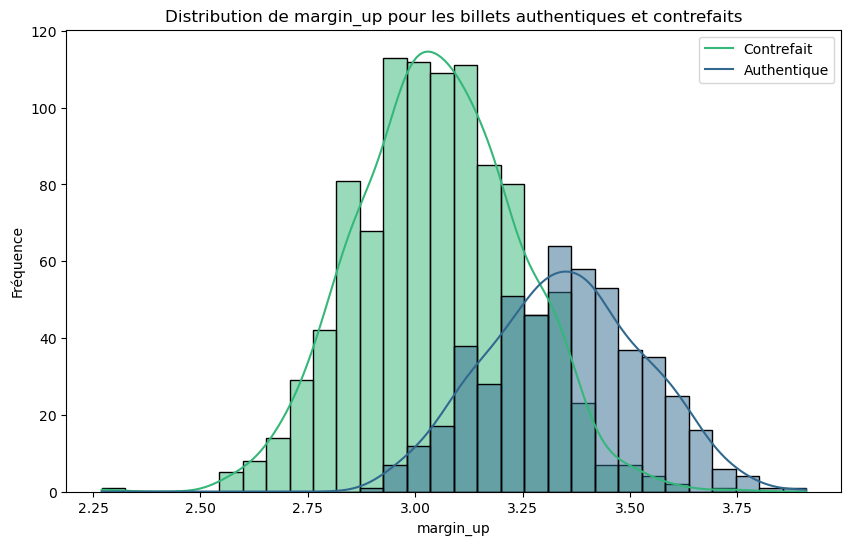

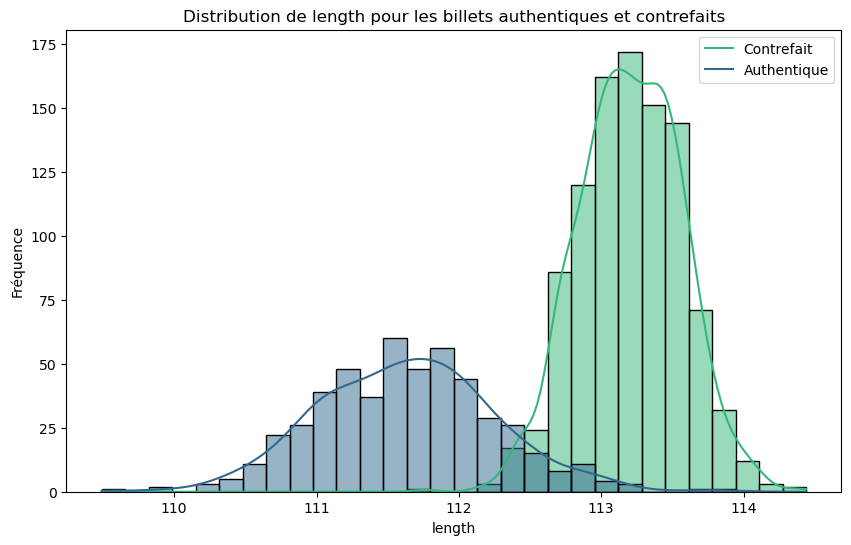

In [12]:
caracteristiques = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

for caracteristique in caracteristiques:
    plt.figure(figsize=(10, 6))
    sns.histplot(donnees_copie, x=caracteristique, hue='is_genuine', kde=True, bins=30, palette='viridis')
    plt.title(f'Distribution de {caracteristique} pour les billets authentiques et contrefaits')
    plt.xlabel(caracteristique)
    plt.ylabel('Fréquence')
    plt.legend(['Contrefait', 'Authentique'])
    plt.show()

On peut observer que les billets contrefaits ont une distribution légèrement différente par rapport aux billets authentiques.

# Matrice de corrélation entre les caractéristiques

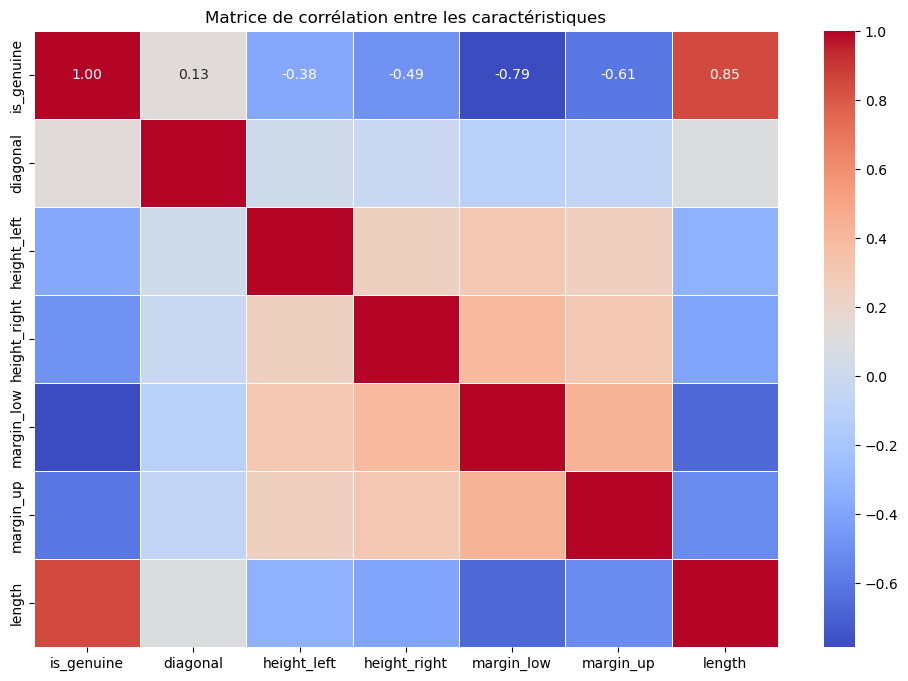

In [13]:
plt.figure(figsize=(12, 8))
matrice_correlation = donnees_copie.corr()
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation entre les caractéristiques')
plt.show()

La matrice montre des corrélations fortes entre certaines caractéristiques et la variable cible (is_genuine), notamment entre `length` et `is_genuine` (0.85) et entre `margin_low` et `is_genuine` (-0.79). Certaines variables, comme `height_left` et `height_right` (corrélation parfaite de 1).


# Analyse en composantes principales (PCA)

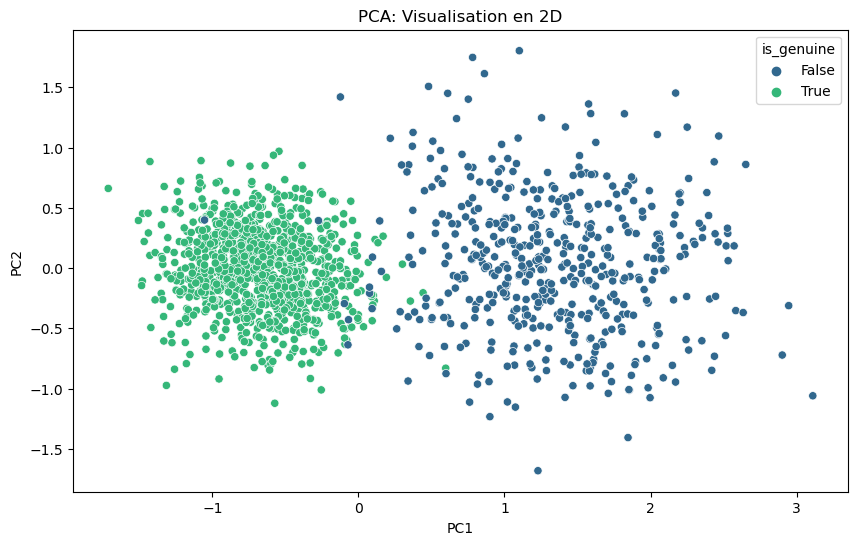

In [14]:
X_pca = donnees_copie.drop('is_genuine', axis=1)
y_pca = donnees['is_genuine']

pca = PCA(n_components=2)
X_pca_transforme = pca.fit_transform(X_pca)

df_pca = pd.DataFrame(data=X_pca_transforme, columns=['PC1', 'PC2'])
df_pca['is_genuine'] = y_pca.values

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='is_genuine', data=df_pca, palette='viridis')
plt.title('PCA: Visualisation en 2D')
plt.show()



Les points verts (True) semblent être plus concentrés autour de l’origine, tandis que les points bleus (False) sont dispersés plus largement le long de l’axe PC1.

# Modèle de Classification (KNN)

#### Séparation du jeu de données pour le modèle KNN

In [15]:
X_knn = np.array(donnees_copie.drop("is_genuine", axis=1))
y_knn = np.array(donnees_copie["is_genuine"])

#### Séparation en ensembles d'entraînement et de test

In [16]:
X_entrainement_knn, X_test_knn, y_entrainement_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.30, random_state=0)

#### Modèle KNN

In [17]:
modele_knn = KNeighborsClassifier(n_neighbors=3).fit(X_entrainement_knn, y_entrainement_knn)

#### Précision sur l'ensemble d'entraînement

In [18]:
precision_entrainement_knn = modele_knn.score(X_entrainement_knn, y_entrainement_knn)
precision_entrainement_knn

0.9923809523809524

#### Précision sur l'ensemble de test


In [19]:
precision_test_knn = modele_knn.score(X_test_knn, y_test_knn)
precision_test_knn

0.9933333333333333

#### Prédictions sur l'ensemble d'entraînement


In [20]:
y_pred_entrainement_knn = modele_knn.predict(X_entrainement_knn)


#### Prédictions sur l'ensemble de test


In [21]:
y_pred_test_knn = modele_knn.predict(X_test_knn)


#### Rapport de classification


In [22]:
rapport_classification_knn = classification_report(y_test_knn, y_pred_test_knn)
print(rapport_classification_knn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       1.00      0.99      0.99       293

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Matrice de confusion


In [23]:
matrice_confusion_knn = confusion_matrix(y_test_knn, y_pred_test_knn)


##### Affichage de la matrice de confusion


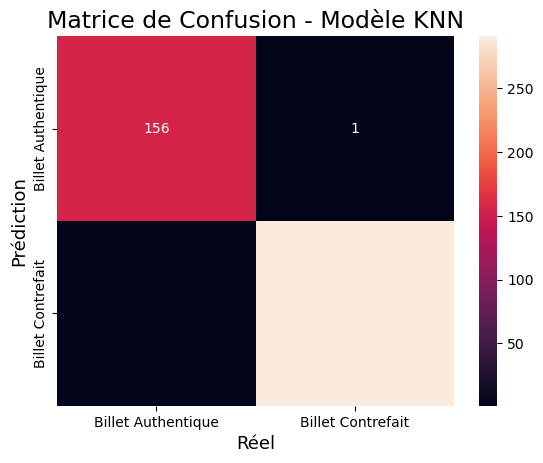

In [24]:

sns.heatmap(matrice_confusion_knn, annot=True, fmt='g', xticklabels=['Billet Authentique', 'Billet Contrefait'], yticklabels=['Billet Authentique', 'Billet Contrefait'])
plt.ylabel('Prédiction', fontsize=13)
plt.xlabel('Réel', fontsize=13)
plt.title('Matrice de Confusion - Modèle KNN', fontsize=17)
plt.show()


le modèle KNN a correctement identifié 156 billets authentiques et a incorrectement classé 1 billet authentique comme contrefait. Le modèle n’a pas fait d’erreurs en classant les billets contrefaits.

### Prédiction d'authenticité pour de nouveaux billets

In [30]:
# Création de données pour tester le modèle KNN
nouveaux_billets = pd.DataFrame({
    'diagonal': [1, 155, 160, 7, 170,120,10],
    'height_left': [1, 7, 8, 9, 10,13,11],
    'height_right': [1, 7, 8, 9, 10,13,12],
    'margin_low': [1, 3, 4, 5, 6,5,20],
    'margin_up': [1, 3, 0, 5, 6,5,0],
    'length': [1, 150, 170, 18, 190,120,14]
})
nouveaux_billets.head()
# Utilisation du modèle KNN pour prédire l'authenticité des nouveaux billets
predictions_nouveaux_billets = modele_knn.predict(nouveaux_billets)

# Affichage des prédictions
resultats_predictions = pd.DataFrame({
    'diagonal': nouveaux_billets['diagonal'],
    'height_left': nouveaux_billets['height_left'],
    'height_right': nouveaux_billets['height_right'],
    'margin_low': nouveaux_billets['margin_low'],
    'margin_up': nouveaux_billets['margin_up'],
    'length': nouveaux_billets['length'],
    'is_genuine_prediction': predictions_nouveaux_billets
})

print(resultats_predictions)


   diagonal  height_left  height_right  margin_low  margin_up  length  \
0         1            1             1           1          1       1   
1       155            7             7           3          3     150   
2       160            8             8           4          0     170   
3         7            9             9           5          5      18   
4       170           10            10           6          6     190   
5       120           13            13           5          5     120   
6        10           11            12          20          0      14   

   is_genuine_prediction  
0                      0  
1                      1  
2                      1  
3                      0  
4                      1  
5                      1  
6                      0  
